In [128]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset and Extracting the Independent and Dependent variables
df = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values #grabs all rows,except last column
y = companies.iloc[:, 4].values #grabs last col as label or what we're testing 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [129]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


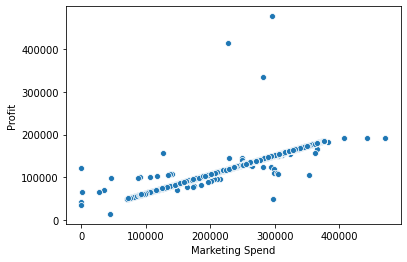

In [141]:
# Data Visualisation
sns.scatterplot(data = companies, x = "Marketing Spend",y = "Profit")

In [131]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],remainder='passthrough')
X = column_transformer.fit_transform(X)

In [145]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [146]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
#Regressor gives the slopes of the y value
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([101532.04083628, 111644.01525865,  54520.3965458 , 128479.50180483,
        94643.86184737,  58238.85717208, 136925.25429059, 126748.18830193,
       155189.84076391, 146506.52993906, 143332.75756457, 162803.99881937,
        94413.65229943, 137420.59791385, 110196.38303729, 154772.53205275,
       158844.96717117, 164562.04074555, 137025.69171424,  82809.21094615,
       162724.90277554,  97281.59789365,  56790.34794009, 102103.92683844,
        86589.11554483, 153130.01105718,  73595.88438066, 120110.91180962,
       117085.40935164,  53659.91303526,  69972.88673503, 150049.34220224,
       141065.13584607, 139887.60183385,  88410.11357908,  51287.73708473,
       182594.25701648,  96781.7561973 , 131591.00179032, 117774.55552127,
       161372.09863625, 163467.03667737, 167465.95701173, 184266.06319856,
        85070.76741595, 143556.9315253 , 122479.62418598,  73995.72170414,
       153350.11623161, 111184.45840022, 181525.96647205,  72448.28569087,
       177454.62067977,  

In [148]:
print(regressor.coef_)

[ 1.30395133e+02 -3.06502201e+02  1.76107067e+02  4.55050322e-01
  1.12600922e+00  1.24831862e-01]


In [149]:
# Calculating the R squared value
from sklearn.metrics import r2_score
#r2_score is a function from metrics
r2_score(y_test, y_pred)

0.9646938783486946